In [87]:
import pandas as pd
from env import get_connection
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire
#import my own prepare module
import prepare

In [ ]:
url = get_connection('iris_db')

In [ ]:
query = '''
SELECT * FROM measurements
JOIN species USING (species_id)
'''

In [ ]:
df = pd.read_sql(query, url)

In [ ]:
df

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df_google = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

In [ ]:
df_google.head(3)

In [ ]:
df_google.shape

In [ ]:
df_google.columns

In [ ]:
df_google.info()

In [ ]:
df_google.describe()

In [ ]:
df_google.nunique()

In [ ]:
df_excel = pd.read_excel('titanic.xlsx')

In [ ]:
df_excel_sample = df_excel.head(100)

In [ ]:
df_excel_sample

In [ ]:
df_excel.shape

In [ ]:
df_excel.columns[0:5]

In [ ]:
df_excel.select_dtypes(['object']).columns

In [ ]:
df_excel.info()

In [ ]:
df_excel.select_dtypes(['int64', 'float64']).columns

In [ ]:
df_excel.describe()

In [ ]:
df_excel[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].max()

In [ ]:
df_excel[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].min()

In [ ]:
(
    df_excel[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].max() - 
    df_excel[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].min()
)

In [ ]:
import acquire

In [ ]:
df = acquire.get_titanic_data()

In [ ]:
df.deck.replace('NaN', 'None Assigned')

In [2]:
df_iris = acquire.get_iris_data()

In [3]:
df_iris

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...,...
145,145,3,146,6.7,3.0,5.2,2.3,virginica
146,146,3,147,6.3,2.5,5.0,1.9,virginica
147,147,3,148,6.5,3.0,5.2,2.0,virginica
148,148,3,149,6.2,3.4,5.4,2.3,virginica


In [ ]:
dropped_columns_df = df_iris.drop(['Unnamed: 0', 'species_id', 'measurement_id'], axis=1)

In [ ]:
dropped_columns_df

In [ ]:
dropped_columns_df.rename(columns = {'species_name':'species'}, inplace = True)

In [ ]:
dropped_columns_df

In [ ]:
dummies = pd.get_dummies(dropped_columns_df[['species']])

In [ ]:
dropped_columns_df = pd.concat([dropped_columns_df, dummies], axis = 1)
dropped_columns_df

In [43]:
def prep_iris(df):
    
    to_drop = ['Unnamed: 0', 'species_id', 'measurement_id']
    
    df.drop(columns = to_drop, inplace = True)
    
    df.rename(columns = {'species_name':'species'}, inplace = True)
    
    dummies = pd.get_dummies(df[['species']])
    
    df = pd.concat([df, dummies], axis = 1)
    
    return df

In [ ]:
test_df = acquire.get_iris_data()
test_df

In [ ]:
new_iris_df = prep_iris(test_df)

In [ ]:
new_iris_df

In [115]:
titanic_new = acquire.get_titanic_data()

In [116]:
titanic_new.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [ ]:
drop_cols = ['Unnamed: 0', 'passenger_id', 'embarked', 'class', 'deck']
titanic_new.drop(columns = drop_cols, inplace = True)

In [ ]:
titanic_new

In [ ]:
dummies = pd.get_dummies(titanic_new[['sex', 'embark_town', 'pclass']])

titanic_new = pd.concat([titanic_new, dummies], axis = 1)

In [ ]:
titanic_new

In [123]:
def prep_titanic(df):
    
    drop_cols = ['Unnamed: 0', 'passenger_id', 'embarked', 'class', 'deck']
    
    df.drop(columns = drop_cols, inplace = True)
    
    dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first = True)

    df = pd.concat([df, dummies], axis = 1)
    
    return df


In [ ]:
test_titanic = acquire.get_titanic_data()
test_titanic

In [ ]:
cleaned_titanic = prep_titanic(test_titanic)

In [ ]:
cleaned_titanic

In [ ]:
telco_df = acquire.get_telco_data()

In [ ]:
telco_df

In [ ]:
useless_cols = ['Unnamed: 0', 'customer_id', 'internet_service_type', 'streaming_tv', 'streaming_movies',
                'contract_type', 'payment_type', 'paperless_billing', 'device_protection']
telco_df.drop(columns = useless_cols, inplace = True)

In [ ]:
telco_df


In [ ]:
dummies = pd.get_dummies(telco_df[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'churn',
                                  'online_security', 'online_backup', 'tech_support']])

telco_df = pd.concat([telco_df, dummies], axis = 1)

In [ ]:
telco_df

In [14]:
def prep_telco(df):
    useless_cols = ['Unnamed: 0', 'customer_id', 'internet_service_type', 'streaming_tv', 'streaming_movies',
                'contract_type', 'payment_type', 'paperless_billing', 'device_protection']
    df.drop(columns = useless_cols, inplace = True)
    
    dummies = pd.get_dummies(df[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'churn',
                                  'online_security', 'online_backup', 'tech_support']], drop_first = True)

    df = pd.concat([df, dummies], axis = 1)
    
    return df
    

In [ ]:
test_telco = acquire.get_telco_data()
test_telco

In [ ]:
new_telco = prep_telco(test_telco)
new_telco

# SPLIT function

In [ ]:
split_iris_df = acquire.get_iris_data()

In [ ]:
clean_iris_df = prep_iris(split_iris_df)

In [ ]:
tvt_iris_train, tvt_iris_val, tvt_iris_test = prepare.train_val_test(clean_iris_df, 'species')

In [ ]:
tvt_iris_train.shape, tvt_iris_val.shape, tvt_iris_test.shape

In [ ]:
split_titanic_df = acquire.get_titanic_data()

In [ ]:
clean_titanic_df = prep_titanic(split_titanic_df)

In [ ]:
tvt_titanic_train, tvt_titanic_val, tvt_titanic_test = prepare.train_val_test(clean_titanic_df, 'survived')

In [ ]:
tvt_titanic_train.shape, tvt_titanic_val.shape, tvt_titanic_test.shape

In [ ]:
split_telco_df = acquire.get_telco_data()

In [ ]:
clean_telco_df = prep_telco(split_telco_df)

In [ ]:
tvt_telco_train, tvt_telco_val, tvt_telco_test = prepare.train_val_test(clean_telco_df, 'churn')

In [ ]:
tvt_telco_train.shape, tvt_telco_val.shape, tvt_telco_test.shape

# Exploratory Exercises


In [44]:
ex_iris_df = acquire.get_iris_data()

In [45]:
ex_iris_df = prep_iris(ex_iris_df)

In [46]:
ex_iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [47]:
ex_iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        150 non-null    float64
 1   sepal_width         150 non-null    float64
 2   petal_length        150 non-null    float64
 3   petal_width         150 non-null    float64
 4   species             150 non-null    object 
 5   species_setosa      150 non-null    uint8  
 6   species_versicolor  150 non-null    uint8  
 7   species_virginica   150 non-null    uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 6.4+ KB


In [48]:
num_vars = ex_iris_df.select_dtypes(include=['float64'])
cat_vars = ex_iris_df.select_dtypes(include=['object', 'uint8'])

In [49]:
train, validate, test = prepare.train_val_test(ex_iris_df, 'species')

In [50]:
train.shape, validate.shape, test.shape

((105, 8), (22, 8), (23, 8))

species
versicolor    35
setosa        35
virginica     35
Name: species, dtype: int64
versicolor    33.333333
setosa        33.333333
virginica     33.333333
Name: species, dtype: float64


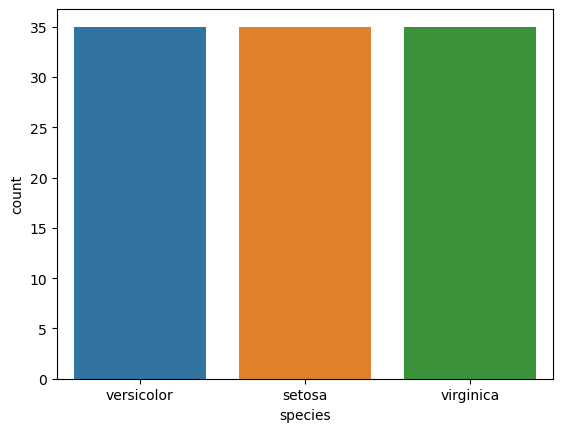

species_setosa
0    70
1    35
Name: species_setosa, dtype: int64
0    66.666667
1    33.333333
Name: species_setosa, dtype: float64


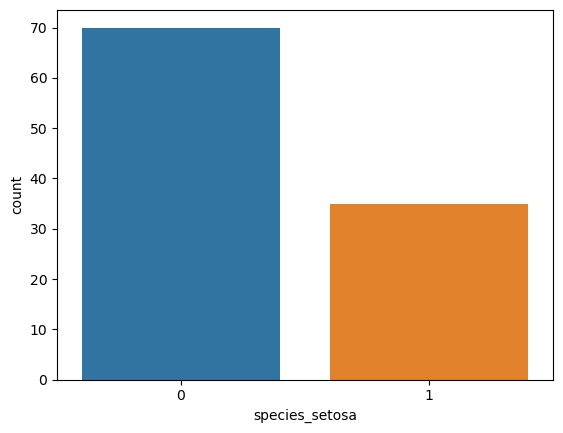

species_versicolor
0    70
1    35
Name: species_versicolor, dtype: int64
0    66.666667
1    33.333333
Name: species_versicolor, dtype: float64


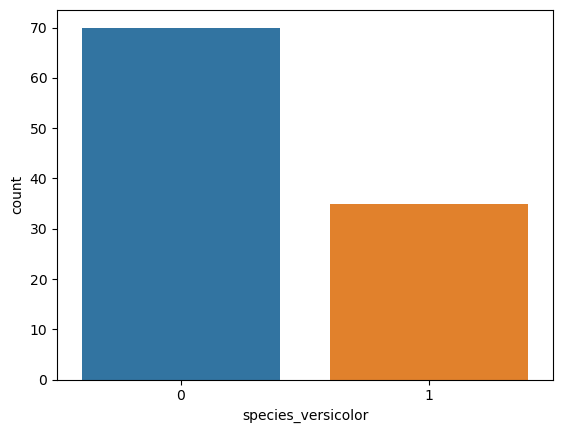

species_virginica
0    70
1    35
Name: species_virginica, dtype: int64
0    66.666667
1    33.333333
Name: species_virginica, dtype: float64


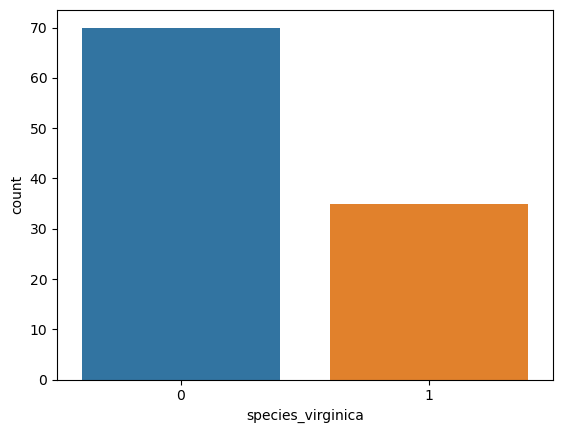

In [51]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize = True) * 100)
    sns.countplot(x = col, data = train)
    plt.show()

sepal_length


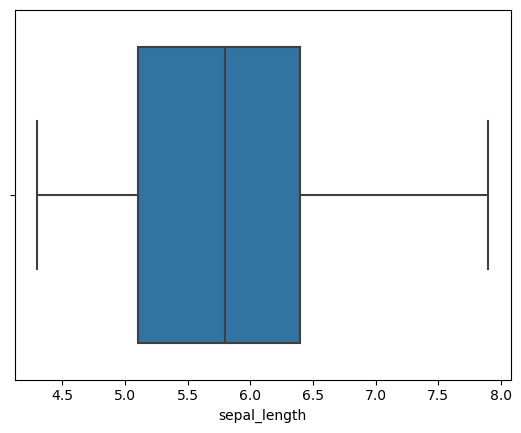

sepal_width


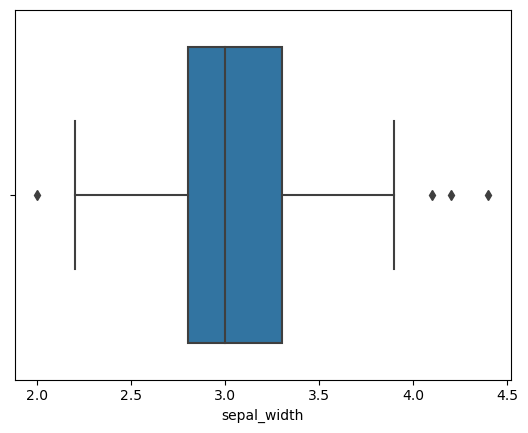

petal_length


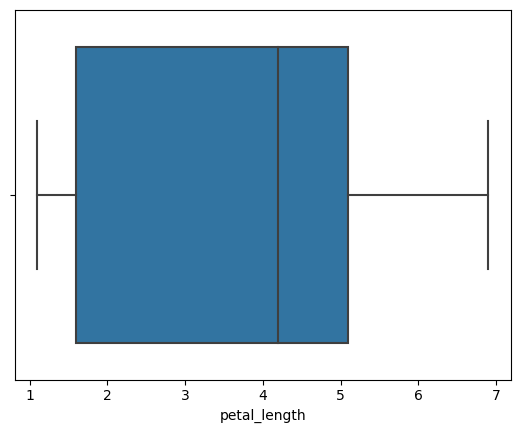

petal_width


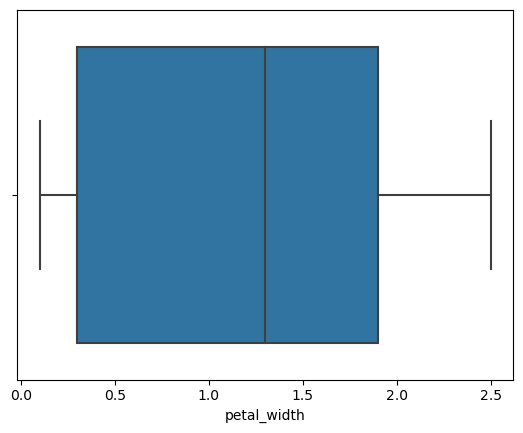

In [52]:
for col in num_vars:
    print(col)
    
    sns.boxplot(x = col, data = train)
    plt.show()

In [53]:
ex_iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333,0.333333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [70]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,5.873333,3.055238,3.784762,1.205714,0.333333,0.333333,0.333333
std,0.862941,0.457203,1.784052,0.777549,0.473665,0.473665,0.473665
min,4.300000,2.000000,1.100000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.200000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.900000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


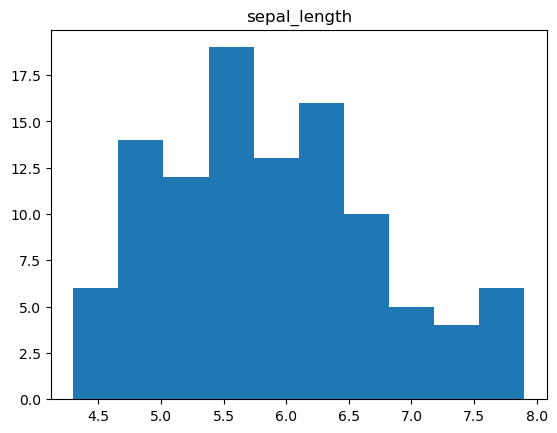

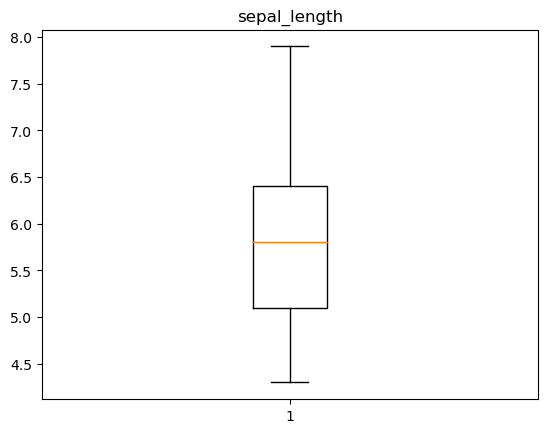

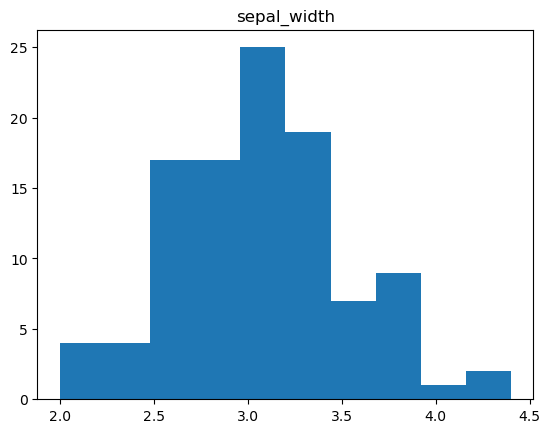

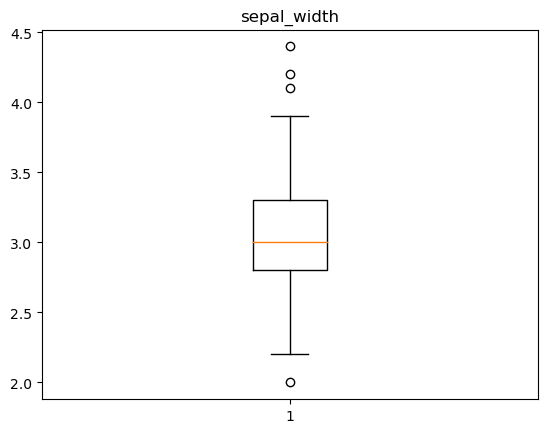

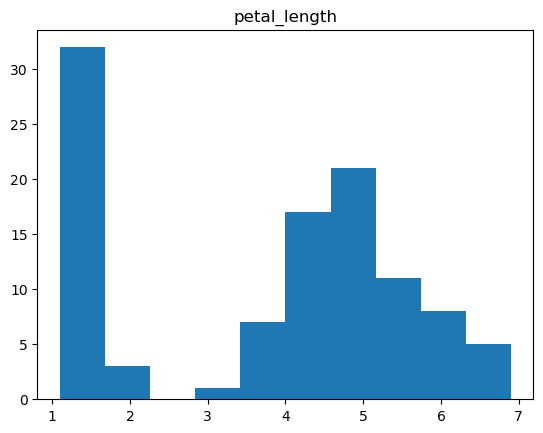

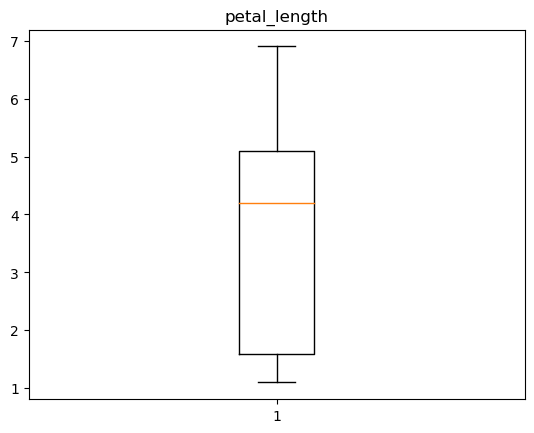

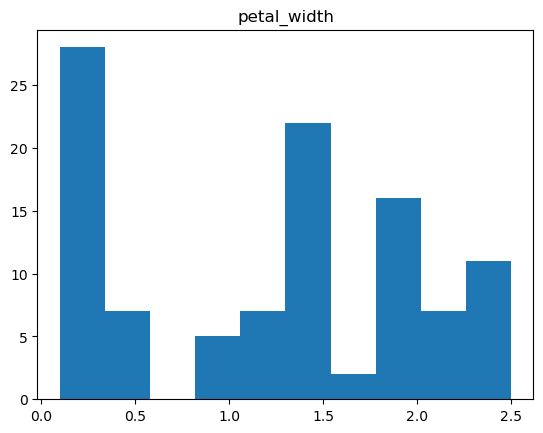

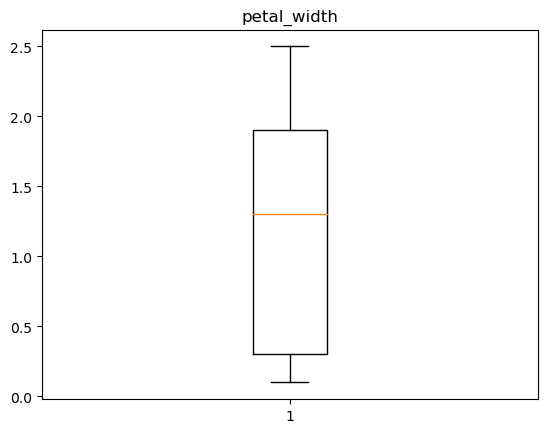

In [71]:
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [72]:
train.species.value_counts()

versicolor    35
setosa        35
virginica     35
Name: species, dtype: int64

(array([35.,  0.,  0.,  0.,  0., 35.,  0.,  0.,  0., 35.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

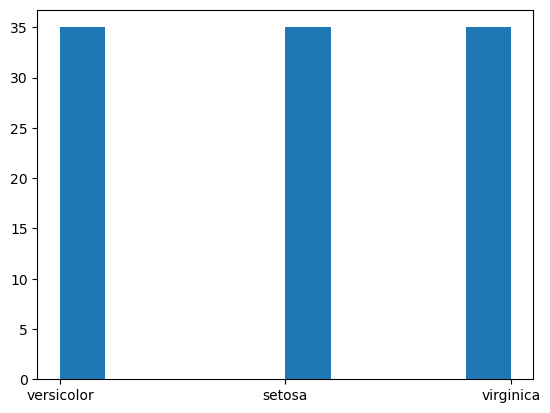

In [73]:
plt.hist(train.species)

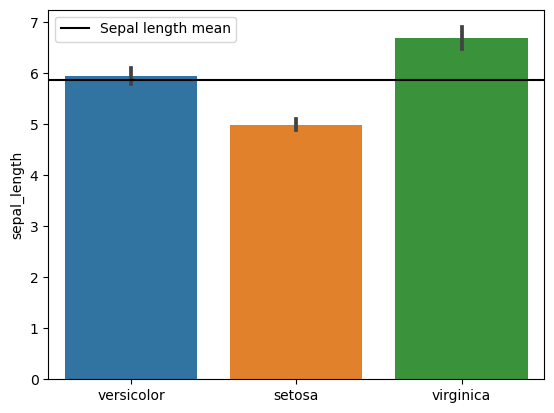

In [78]:
sns.barplot(x="species", y="sepal_length", data=train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Sepal length mean", color='black')
plt.legend()
plt.show()


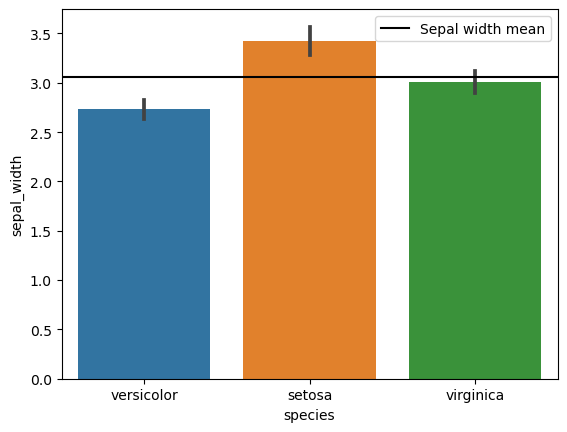

In [79]:
sns.barplot(x="species", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Sepal width mean", color='black')
plt.legend()
plt.show()


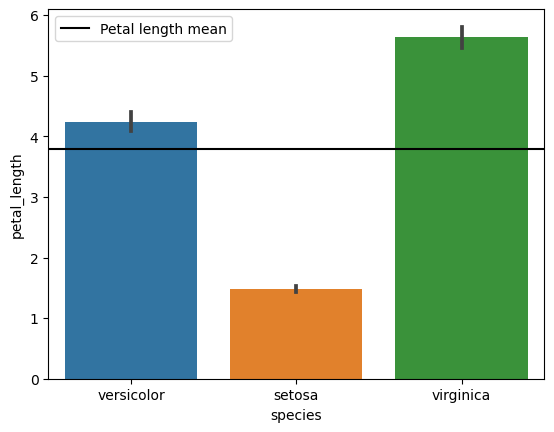

In [81]:
sns.barplot(x="species", y="petal_length", data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="Petal length mean", color='black')
plt.legend()
plt.show()

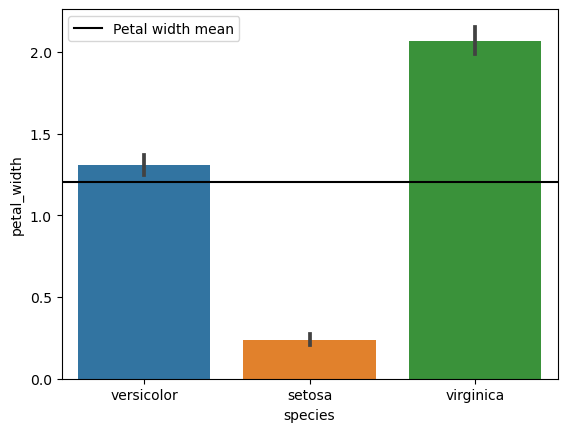

In [82]:
sns.barplot(x="species", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Petal width mean", color='black')
plt.legend()
plt.show()

In [83]:
virginica_describe_sl = pd.DataFrame(train[train.species == 'virginica'].sepal_length.describe())
virginica_describe_sw = pd.DataFrame(train[train.species == 'virginica'].sepal_width.describe())
virginica_describe_pl = pd.DataFrame(train[train.species == 'virginica'].petal_length.describe())
virginica_describe_pw = pd.DataFrame(train[train.species == 'virginica'].petal_width.describe())

virginica_describe = pd.concat([virginica_describe_sl, virginica_describe_sw], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pl], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pw], axis=1)
virginica_describe

,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,35.000000,35.000000,35.000000
mean,6.682857,3.008571,5.631429,2.068571
std,0.661320,0.347573,0.576384,0.256414
min,5.600000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.900000
50%,6.700000,3.000000,5.600000,2.100000
75%,7.200000,3.200000,6.000000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [84]:
setosa_describe_sl = pd.DataFrame(train[train.species == 'setosa'].sepal_length.describe())
setosa_describe_sw = pd.DataFrame(train[train.species == 'setosa'].sepal_width.describe())
setosa_describe_pl = pd.DataFrame(train[train.species == 'setosa'].petal_length.describe())
setosa_describe_pw = pd.DataFrame(train[train.species == 'setosa'].petal_width.describe())

setosa_describe = pd.concat([setosa_describe_sl, setosa_describe_sw], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pl], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pw], axis=1)
setosa_describe


,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,35.000000,35.000000,35.000000
mean,4.988571,3.425714,1.485714,0.240000
std,0.326092,0.423114,0.153667,0.097619
min,4.300000,2.300000,1.100000,0.100000
25%,4.800000,3.100000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.150000,3.700000,1.550000,0.300000
max,5.700000,4.400000,1.900000,0.400000


In [85]:
versicolor_describe_sl = pd.DataFrame(train[train.species == 'versicolor'].sepal_length.describe())
versicolor_describe_sw = pd.DataFrame(train[train.species == 'versicolor'].sepal_width.describe())
versicolor_describe_pl = pd.DataFrame(train[train.species == 'versicolor'].petal_length.describe())
versicolor_describe_pw = pd.DataFrame(train[train.species == 'versicolor'].petal_width.describe())

versicolor_describe = pd.concat([versicolor_describe_sl, versicolor_describe_sw], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pl], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pw], axis=1)
versicolor_describe

,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,35.000000,35.000000,35.000000
mean,5.948571,2.731429,4.237143,1.308571
std,0.497861,0.296818,0.466581,0.191544
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.550000,4.000000,1.200000
50%,5.900000,2.800000,4.200000,1.300000
75%,6.250000,2.950000,4.600000,1.450000
max,7.000000,3.200000,5.100000,1.800000


In [88]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="two-sided")
t, p

(1215.0, 1.2684064129030708e-12)

In [89]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="two-sided")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')


Comparing sepal_length between virginica and versicolor
991.0 8.6702248695785e-06
------------------


Comparing sepal_width between virginica and versicolor
886.0 0.00125814471589653
------------------


Comparing petal_length between virginica and versicolor
1211.5 1.9712504979106726e-12
------------------


Comparing petal_width between virginica and versicolor
1215.0 1.2684064129030708e-12
------------------




In [90]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

In [91]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica,sepal_area,petal_area
98,5.1,2.5,3.0,1.1,versicolor,0,1,0,12.75,3.30
68,6.2,2.2,4.5,1.5,versicolor,0,1,0,13.64,6.75
19,5.1,3.8,1.5,0.3,setosa,1,0,0,19.38,0.45
143,6.8,3.2,5.9,2.3,virginica,0,0,1,21.76,13.57
99,5.7,2.8,4.1,1.3,versicolor,0,1,0,15.96,5.33


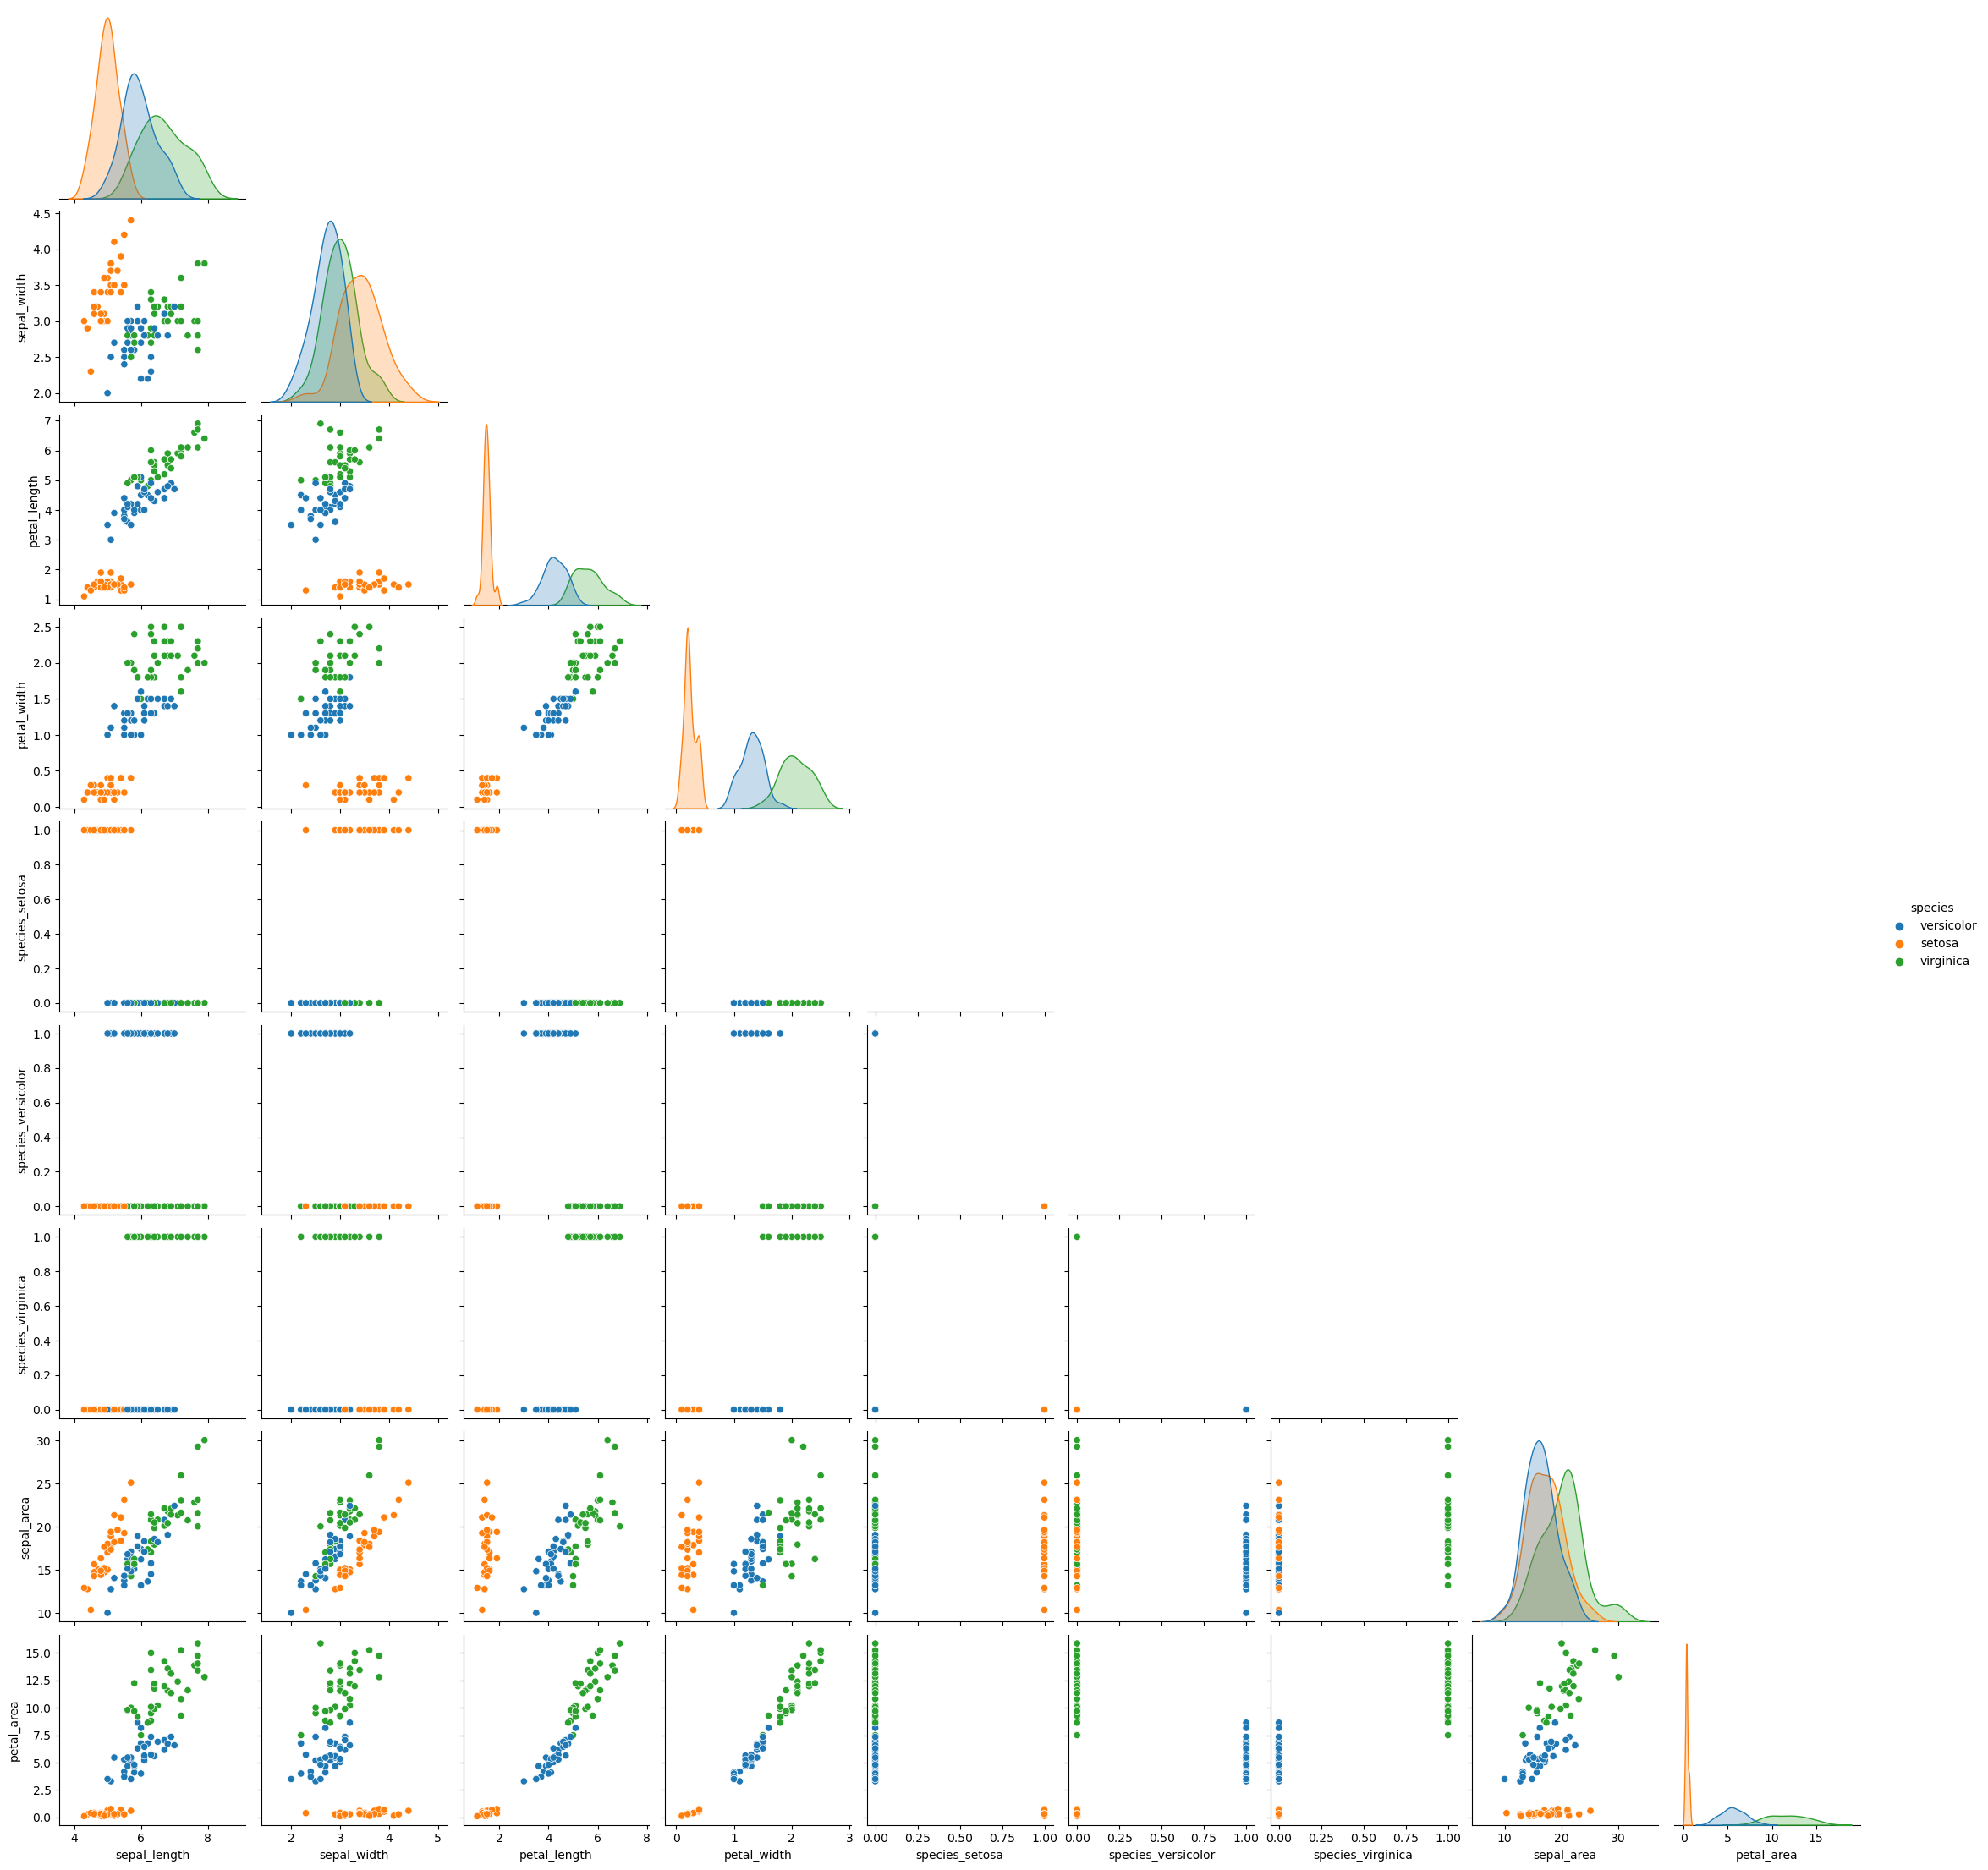

In [92]:
sns.pairplot(train, hue='species', corner=True)
plt.show()

In [93]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]


In [94]:
combos[0]

('sepal_length', 'sepal_width')

In [95]:
train.groupby('species')['sepal_area'].sum()

species
setosa        601.80
versicolor    571.06
virginica     707.32
Name: sepal_area, dtype: float64

In [96]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()


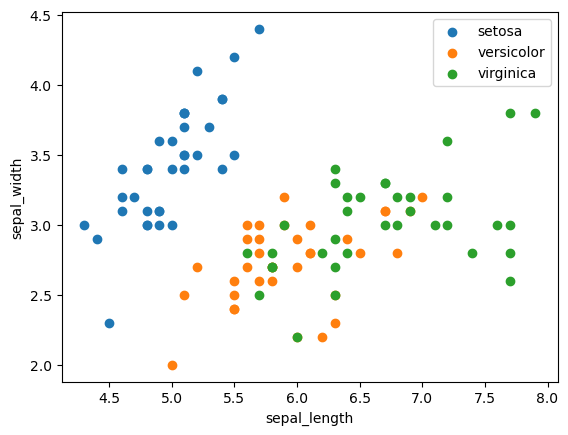

In [97]:
scatter_species(x,y)

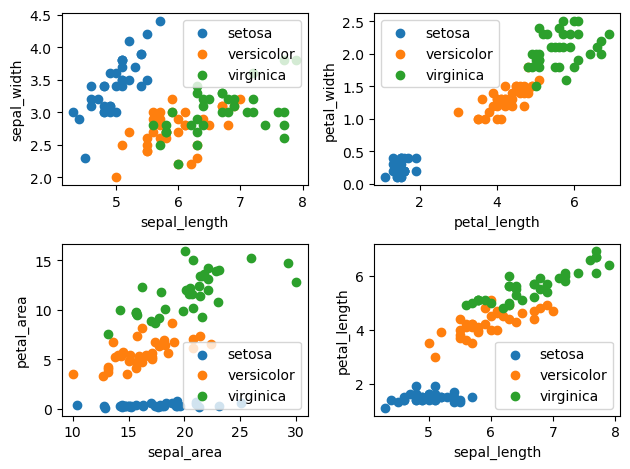

In [98]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()


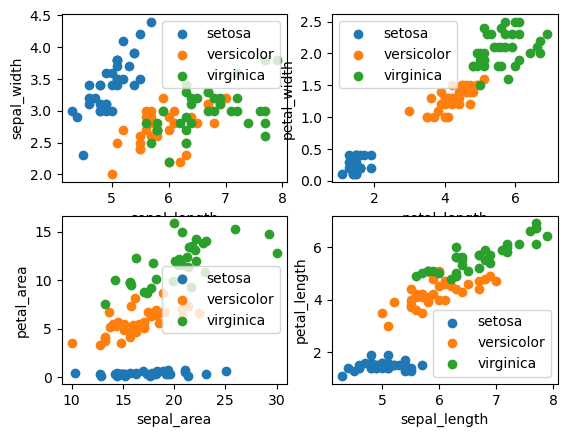

In [99]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

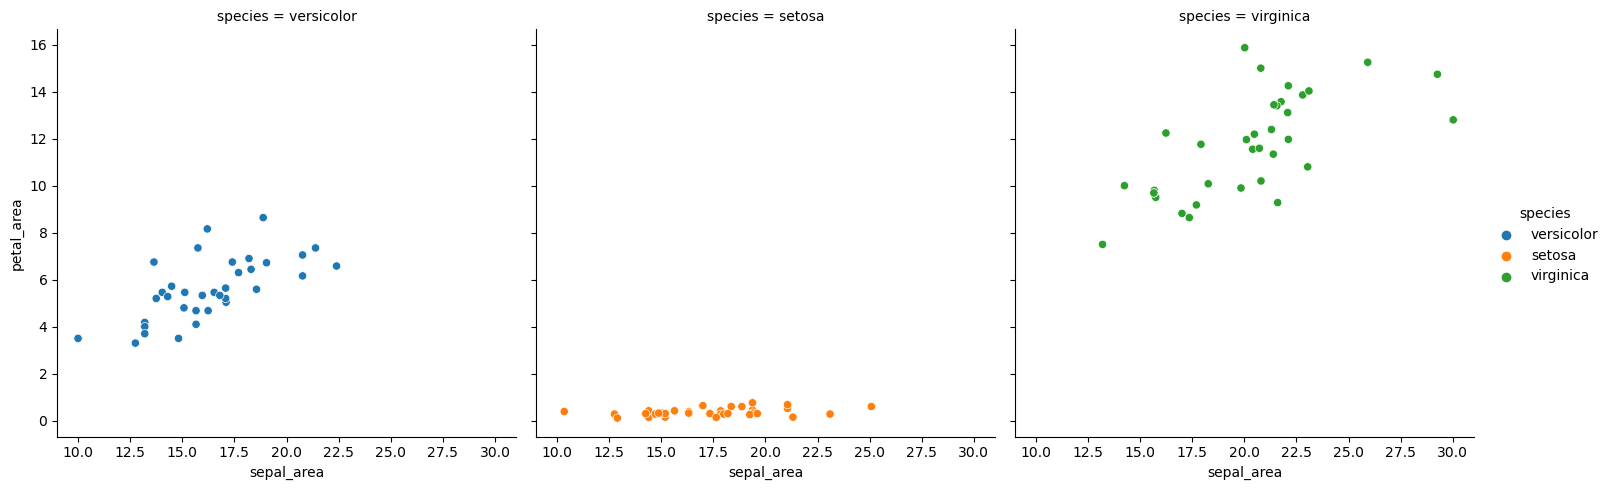

In [100]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

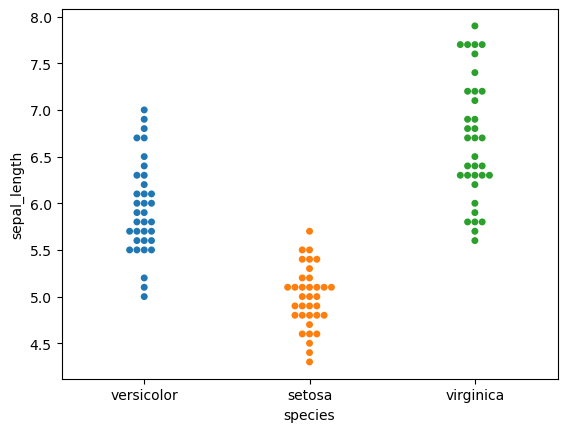

In [101]:
sns.swarmplot(data=train, x='species', y='sepal_length')

In [102]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica,sepal_area,petal_area
98,5.1,2.5,3.0,1.1,versicolor,0,1,0,12.75,3.30
68,6.2,2.2,4.5,1.5,versicolor,0,1,0,13.64,6.75
19,5.1,3.8,1.5,0.3,setosa,1,0,0,19.38,0.45
143,6.8,3.2,5.9,2.3,virginica,0,0,1,21.76,13.57
99,5.7,2.8,4.1,1.3,versicolor,0,1,0,15.96,5.33


In [103]:
train_melt = train.melt(id_vars = 'species')

In [104]:
train_melt.head()

,species,variable,value
0,versicolor,sepal_length,5.1
1,versicolor,sepal_length,6.2
2,setosa,sepal_length,5.1
3,virginica,sepal_length,6.8
4,versicolor,sepal_length,5.7


<AxesSubplot:xlabel='variable', ylabel='value'>

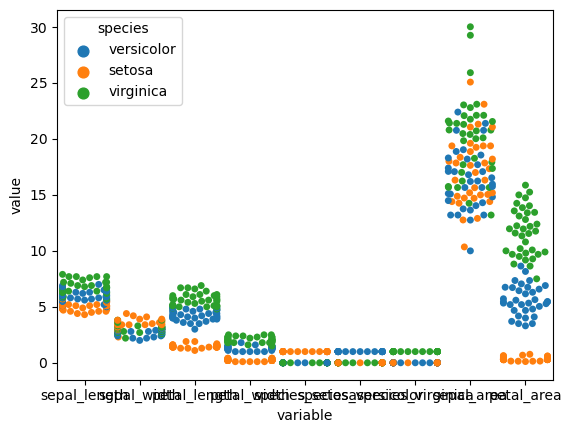

In [105]:
sns.swarmplot(data=train_melt, x='variable', y='value', hue='species')

In [106]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica,sepal_area,petal_area
sepal_length,1.000000,-0.097127,0.888678,0.829386,-0.728465,0.061947,0.666518,0.683622,0.868889
sepal_width,-0.097127,1.000000,-0.379955,-0.327632,0.575724,-0.503203,-0.072520,0.654054,-0.240303
petal_length,0.888678,-0.379955,1.000000,0.964521,-0.915595,0.180161,0.735434,0.401545,0.959730
petal_width,0.829386,-0.327632,0.964521,1.000000,-0.882437,0.093987,0.788450,0.397680,0.979173
species_setosa,-0.728465,0.575724,-0.915595,-0.882437,1.000000,-0.500000,-0.500000,-0.141177,-0.805898
species_versicolor,0.061947,-0.503203,0.180161,0.093987,-0.500000,1.000000,-0.500000,-0.315279,-0.040818
species_virginica,0.666518,-0.072520,0.735434,0.788450,-0.500000,-0.500000,1.000000,0.456456,0.846716
sepal_area,0.683622,0.654054,0.401545,0.397680,-0.141177,-0.315279,0.456456,1.000000,0.490520
petal_area,0.868889,-0.240303,0.959730,0.979173,-0.805898,-0.040818,0.846716,0.490520,1.000000


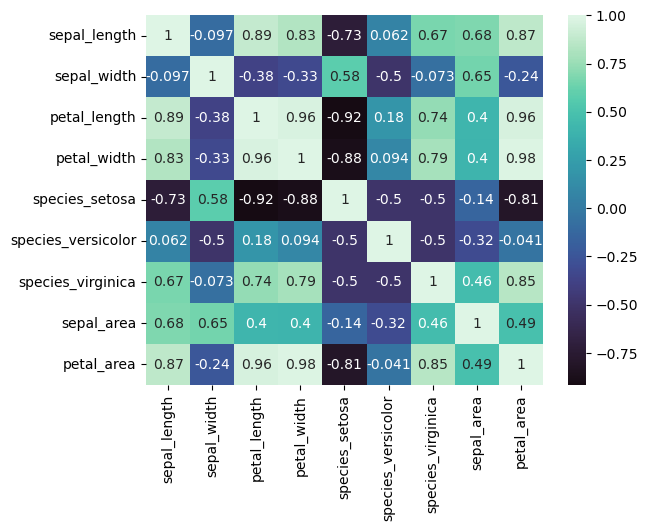

In [107]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()


In [124]:
titanic_df = acquire.get_titanic_data()

In [125]:
titanic_df = prep_titanic(titanic_df)

In [128]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1


In [129]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sex                      891 non-null    object 
 3   age                      714 non-null    float64
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   embark_town              889 non-null    object 
 8   alone                    891 non-null    int64  
 9   sex_male                 891 non-null    uint8  
 10  embark_town_Queenstown   891 non-null    uint8  
 11  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 65.4+ KB


In [ ]:
useless_cols = ['fare', 'embark_town', 'embark_town_Queenstown', 'embark_town_Southampton', 'sex_male']
titanic_df.drop(columns = useless_cols, inplace = True)

In [183]:
titanic_df = prep_titanic(titanic_df)

,survived,pclass,sex,age,sibsp,parch,alone
0,0,3,male,22.0,1,0,0
1,1,1,female,38.0,1,0,0
2,1,3,female,26.0,0,0,1
3,1,1,female,35.0,1,0,0
4,0,3,male,35.0,0,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,1
887,1,1,female,19.0,0,0,1
888,0,3,female,NaN,1,2,0
889,1,1,male,26.0,0,0,1


In [181]:
titanic_df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [185]:
train, val, test = prepare.train_val_test(titanic_df, 'survived')

In [186]:
train.shape, val.shape, test.shape


((623, 7), (134, 7), (134, 7))

In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  623 non-null    int64  
 1   pclass    623 non-null    int64  
 2   sex       623 non-null    object 
 3   age       504 non-null    float64
 4   sibsp     623 non-null    int64  
 5   parch     623 non-null    int64  
 6   alone     623 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 38.9+ KB


In [190]:
train.describe()

,survived,pclass,age,sibsp,parch,alone
count,623.000000,623.000000,504.000000,623.000000,623.000000,623.000000
mean,0.383628,2.319422,30.045476,0.457464,0.377207,0.622793
std,0.486660,0.830909,14.502377,0.964501,0.841409,0.485077
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000


In [220]:
def relation(df, col_a, col_b):
    observation = pd.crosstab(col_a, col_b)
    return observation

In [223]:
alone = relation(titanic_df, titanic_df.survived, titanic_df.alone)
alone

alone,0,1
survived,,
0,175,374
1,179,163


In [224]:
chi2, p, degf, expected = stats.chi2_contingency(alone)

In [226]:
print('Observed Values\n')
print(alone.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print(f'chi^2 = {chi2:.4f}')
print(f'p = {p:.4f}')

Observed Values

[[175 374]
 [179 163]]
---
Expected Values

[[218 330]
 [135 206]]
chi^2 = 36.0005
p = 0.0000


In [227]:
pclass = relation(titanic_df, titanic_df.survived, titanic_df.pclass)
pclass

pclass,1,2,3
survived,,,
0,80,97,372
1,136,87,119


In [228]:
chi2, p, degf, expected = stats.chi2_contingency(pclass)

In [229]:
print('Observed Values\n')
print(pclass.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print(f'chi^2 = {chi2:.4f}')
print(f'p = {p:.4f}')

Observed Values

[[ 80  97 372]
 [136  87 119]]
---
Expected Values

[[133 113 302]
 [ 82  70 188]]
chi^2 = 102.8890
p = 0.0000


In [231]:
parch = relation(titanic_df, titanic_df.survived, titanic_df.parch)
parch

parch,0,1,2,3,4,5,6
survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [237]:
chi2, p, degf, expected = stats.chi2_contingency(parch)

In [238]:
print('Observed Values\n')
print(parch.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print(f'chi^2 = {chi2:.4f}')
print(f'p = {p:.4f}')

Observed Values

[[445  53  40   2   4   4   1]
 [233  65  40   3   0   1   0]]
---
Expected Values

[[417  72  49   3   2   3   0]
 [260  45  30   1   1   1   0]]
chi^2 = 27.9258
p = 0.0001


In [239]:
sex = relation(titanic_df, titanic_df.survived, titanic_df.sex)
sex

sex,female,male
survived,,
0,81,468
1,233,109


In [240]:
chi2, p, degf, expected = stats.chi2_contingency(sex)

In [241]:
print('Observed Values\n')
print(sex.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print(f'chi^2 = {chi2:.4f}')
print(f'p = {p:.4f}')

Observed Values

[[ 81 468]
 [233 109]]
---
Expected Values

[[193 355]
 [120 221]]
chi^2 = 260.7170
p = 0.0000


In [244]:
sibsp = relation(titanic_df, titanic_df.survived, titanic_df.sibsp)
sibsp

sibsp,0,1,2,3,4,5,8
survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [245]:
chi2, p, degf, expected = stats.chi2_contingency(sibsp)

In [246]:
print('Observed Values\n')
print(sibsp.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print(f'chi^2 = {chi2:.4f}')
print(f'p = {p:.4f}')

Observed Values

[[398  97  15  12  15   5   7]
 [210 112  13   4   3   0   0]]
---
Expected Values

[[374 128  17   9  11   3   4]
 [233  80  10   6   6   1   2]]
chi^2 = 37.2718
p = 0.0000


In [263]:
columns = [['sibsp', 'parch', 'sex', 'pclass', 'alone']]

<AxesSubplot:xlabel='parch', ylabel='survived'>

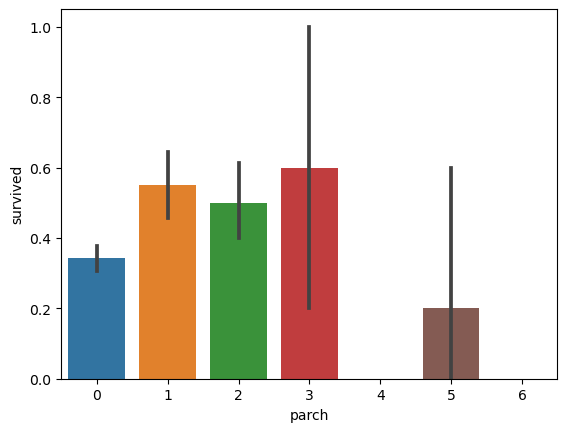

In [266]:
sns.barplot(x = 'parch', y = 'survived', data = titanic_df)
 